#### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import seaborn as sns

import plotly.express as px
%matplotlib inline
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS 



In [2]:
new_year = pd.read_csv("C:/Users/Shagun/Downloads/New_years_resolutions/New_years_resolutions.csv")

In [3]:
new_year.head()

,tweet_created,tweet_text,tweet_category,tweet_topics,tweet_location,tweet_state,tweet_region,user_timezone,user_gender,retweet_count
0,2014-12-21 16:11:00,#NewYearsResolution to not put the parking lot...,Humor,Humor about Personal Growth and Interests Reso...,"City of Angels, CA",CA,West,Pacific Time (US & Canada),male,NaN
1,2014-12-21 16:16:00,I got the hair. I just need to work on the bod...,Health & Fitness,Improve my body,"Arlington, TX",TX,South,Central Time (US & Canada),male,NaN
2,2014-12-21 16:30:00,"Self improvement!.. Mentally, physically, and ...",Personal Growth,Improve my attitude,"Las Vegas, NV",NV,West,Central Time (US & Canada),male,NaN
3,2014-12-21 17:51:00,I've decided to get pregnant in #2015 #NewYear...,Humor,Humor about Family/Friends/Relationships Resol...,"Ft. Luderdale, Florida",FL,South,NaN,male,NaN
4,2014-12-21 18:09:00,All I want for Christmas is to be Carrie Under...,Personal Growth,Other,South Carolina,SC,South,Pacific Time (US & Canada),female,NaN


#### Pie chart to display tweet category popularity

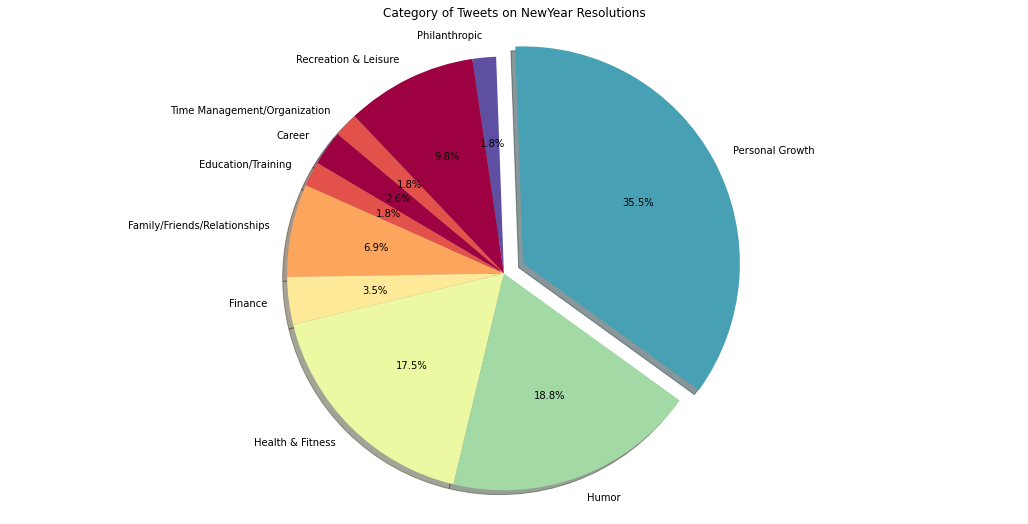

In [4]:
#Create and display pie chart to know the tweet category popularity


labels = 'Career', 'Education/Training','Family/Friends/Relationships', 'Finance','Health & Fitness','Humor','Personal Growth','Philanthropic','Recreation & Leisure', 'Time Management/Organization'
sizes = [123,87,327,167,825,887,1678,83,461,85]
explode = (0, 0, 0, 0,0,0,0.1,0,0,0)
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1],title='Category of Tweets on NewYear Resolutions')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [5]:
new_year.user_gender.value_counts()

female    2367
male      2356
Name: user_gender, dtype: int64

#### Stacked bar chart to study tweet category for each gender

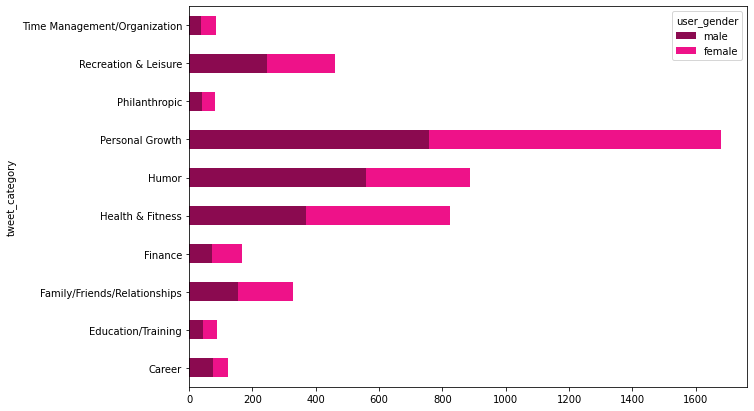

In [7]:
tweetcategory_gender = new_year.groupby(by=['tweet_category','user_gender'],sort=False)['tweet_created'].agg([('count','count')]).reset_index().sort_values(by='count',ascending=False)
list = ['Career', 'Education/Training','Family/Friends/Relationships', 'Finance','Health & Fitness','Humor','Personal Growth','Philanthropic','Recreation & Leisure', 'Time Management/Organization']
category_gender = tweetcategory_gender[tweetcategory_gender.tweet_category.str.contains('|'.join(list))]

pivot_df = category_gender.pivot(index='tweet_category', columns='user_gender', values='count')
colors = ["#8B0A50", "#EE1289","#1E90FF"]
pivot_df.loc[:,['male','female']].plot.barh(stacked=True, color=colors, figsize=(10,7))
plt.show()

#### Popularity of tweet categories in terms of retweets

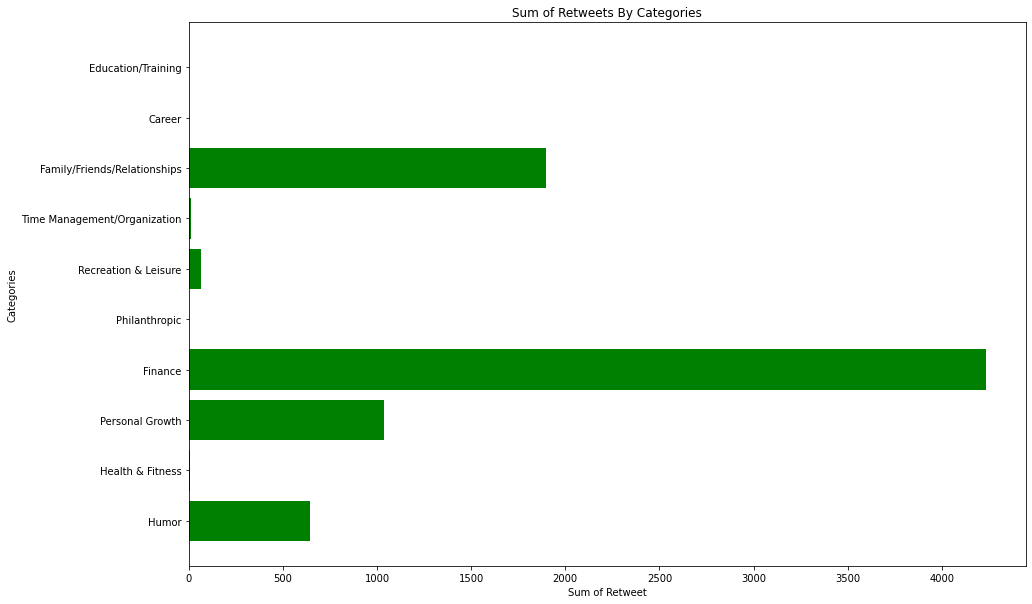

In [9]:
fig = plt.figure(figsize = (15, 10)) 
np.seterr(invalid='ignore')
# creating the bar plot 
plt.barh(new_year['tweet_category'], new_year['retweet_count'], color ='green') 
  
plt.xlabel("Sum of Retweet") 
plt.ylabel("Categories") 
plt.title("Sum of Retweets By Categories") 
plt.show()

#### Popularity of tweets region wise

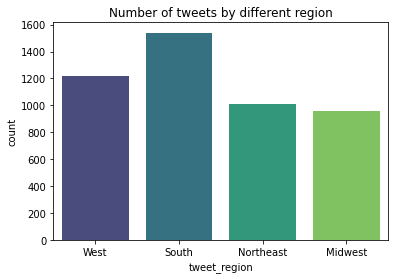

In [11]:
sns.countplot(x='tweet_region',data=new_year,palette='viridis')
plt.title('Number of tweets by different region')
plt.show()

In [12]:
#region_state = new_year.groupby(['tweet_region','tweet_state'],sort=False)['tweet_created'].agg([('count','count')]).reset_index().sort_values(by=['tweet_region','count'],ascending=[True,False])
#region_state['us'] = 'US' # in order to have a single root node
#fig = px.treemap(region_state, path=['us', 'tweet_region', 'tweet_state'], values='count', color='tweet_state',color_continuous_scale='RdBu')
#fig.show()

#### Word cloud for visualization


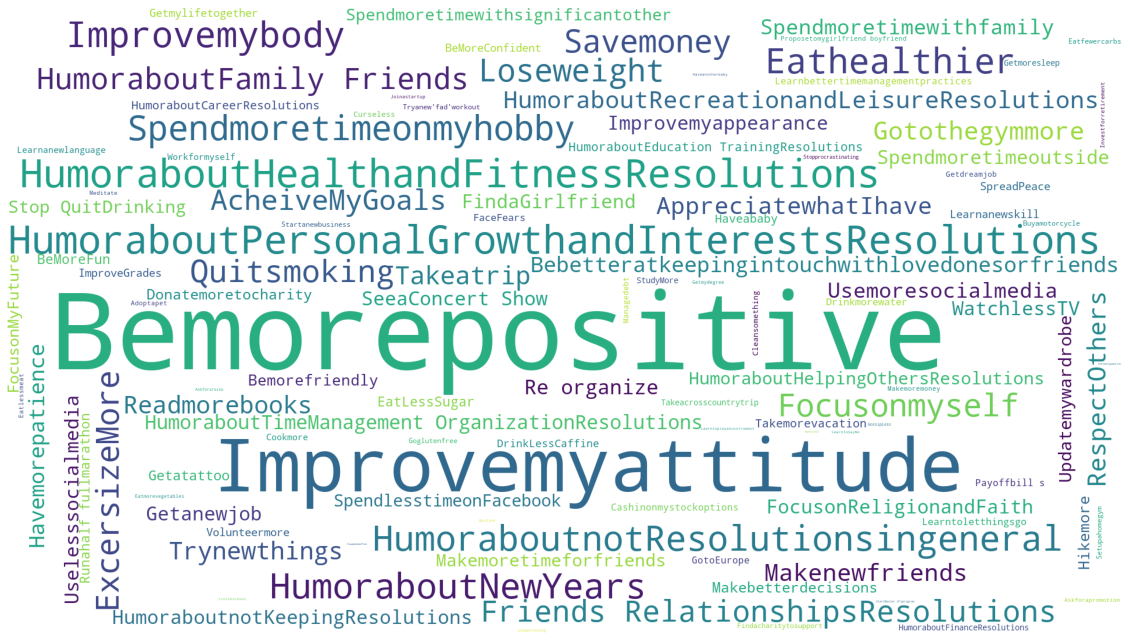

In [14]:
new_year.tweet_topics = new_year.tweet_topics.str.replace(' ', '')
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(new_year.tweet_topics))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('tweet_topics.png')
plt.show()

In [15]:
new_year['date_time'] = pd.to_datetime(new_year['tweet_created'])
new_year['date_hour'] = new_year['date_time'].dt.strftime('%Y/%m/%d/%H')
print(new_year[['tweet_created','date_time', 'date_hour']])

            tweet_created           date_time      date_hour
0     2014-12-21 16:11:00 2014-12-21 16:11:00  2014/12/21/16
1     2014-12-21 16:16:00 2014-12-21 16:16:00  2014/12/21/16
2     2014-12-21 16:30:00 2014-12-21 16:30:00  2014/12/21/16
3     2014-12-21 17:51:00 2014-12-21 17:51:00  2014/12/21/17
4     2014-12-21 18:09:00 2014-12-21 18:09:00  2014/12/21/18
5     2014-12-21 18:18:00 2014-12-21 18:18:00  2014/12/21/18
6     2014-12-21 18:50:00 2014-12-21 18:50:00  2014/12/21/18
7     2014-12-21 19:12:00 2014-12-21 19:12:00  2014/12/21/19
8     2014-12-21 19:32:00 2014-12-21 19:32:00  2014/12/21/19
9     2014-12-21 19:46:00 2014-12-21 19:46:00  2014/12/21/19
10    2014-12-21 19:46:00 2014-12-21 19:46:00  2014/12/21/19
11    2014-12-21 20:05:00 2014-12-21 20:05:00  2014/12/21/20
12    2014-12-21 20:10:00 2014-12-21 20:10:00  2014/12/21/20
13    2014-12-21 20:37:00 2014-12-21 20:37:00  2014/12/21/20
14    2014-12-21 20:51:00 2014-12-21 20:51:00  2014/12/21/20
15    2014-12-21 21:03:0